In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Average Temperature = 300.07 ± 2.11 K


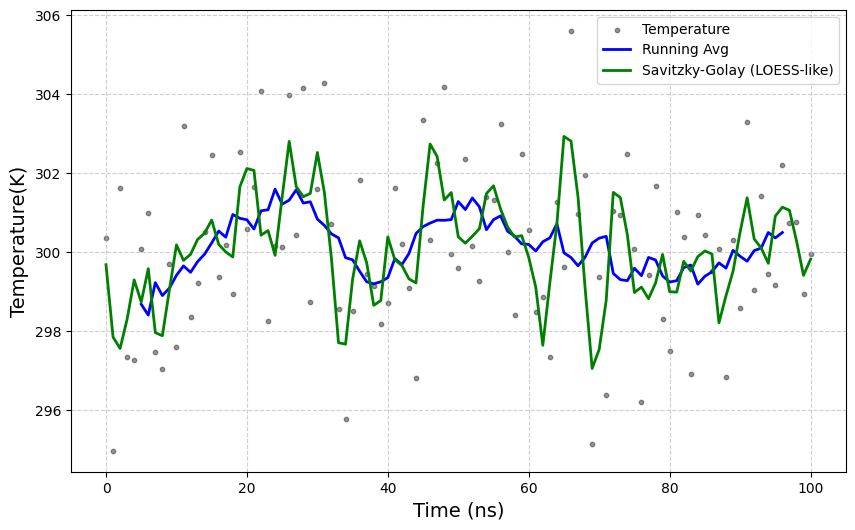

In [ ]:
fyle = "/Users/samirabaghbanbari/samira/code/data/temperature.xvg"

#to extract the time and density columns
time = []
temp = []

with open(fyle, "r") as fyle:
    for line in fyle:
        if line.startswith(("#", "@")):
            continue
        parts = line.strip().split()
        if len(parts) >= 2:
            try:
                t = float(parts[0])
                te = float(parts[1])
                time.append(t)
                temp.append(te)
            except ValueError:
                continue
        
df = pd.DataFrame({"Time_ps": time, "Temperature_K": temp})
# Compute running average (moving window of e.g. 10 points)
window_size = 10
df["RunningAvg"] = df["Temperature_K"].rolling(window=window_size, center=True).mean()
# mean and std deviation
mean_temperature = df["Temperature_K"].mean()
std_temperature = df["Temperature_K"].std()
print(f"Average Temperature = {mean_temperature:.2f} ± {std_temperature:.2f} K")
# apply LOESS fit 
from scipy.signal import savgol_filter
import numpy as np

x = df["Time_ps"].values
y = df["Temperature_K"].values

# plt.figure(figsize=(10, 6))
# plt.plot(df["Time_ps"], df["Temperature_K"], label="temperature", color = "red")
# plt.xlabel("Time_ps", fontsize=12)
# plt.ylabel("Temperature_K", fontsize=14)
# plt.legend()
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.tight_layout()
  

# Savitzky-Golay smoothing (like LOESS, local polynomial fit)
polyorder = 5
y_savgol = savgol_filter(y, window_size, polyorder)

plt.figure(figsize=(10, 6))
plt.xlabel("Time (ns)", fontsize=14)
plt.ylabel("Temperature(K)", fontsize=14)
plt.scatter(x, y, color="black", s=10, alpha=0.4, label="Temperature")
plt.plot(x, df["RunningAvg"], color="blue", linewidth=2, label="Running Avg")
plt.plot(x, y_savgol, color="green", linewidth=2, label="Savitzky-Golay (LOESS-like)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
# plt.savefig("Temperature_vs_time.pdf", dpi=400)